<a href="https://colab.research.google.com/github/dmsze/Mining-project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('students_adaptability_level_online_education.csv')
df=pd.DataFrame(data)
df_copy=df.copy()
df.head()



,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
#Statistical summries
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


From the statistical summary, we can see for each attribute how many entries there are (count), how many different categories exist (unique), which value appears the most (top), and how many times it appears (freq). This helps me notice which values are the most common, like the most used device or the most frequent institution type.


In [19]:
#Missing values , we do not have missing values
df.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


The dataset contains no missing values in any column (all 1205 rows × 14 attributes are complete). Therefore, no imputation or deletion of missing data is required at this stage.

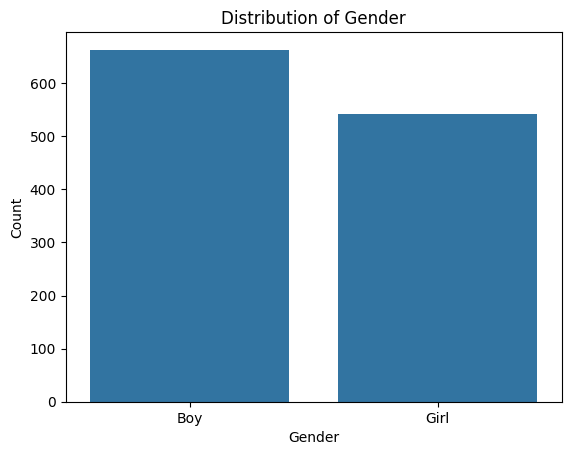

In [20]:
#Bar-plot for Gender attribute
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.show()

Distribution of Gender: Bar Chart
This bar chart shows that the dataset has more boys (about 55%) than girls (about 45%).. the difference is not very large, but boys are still the majority group.


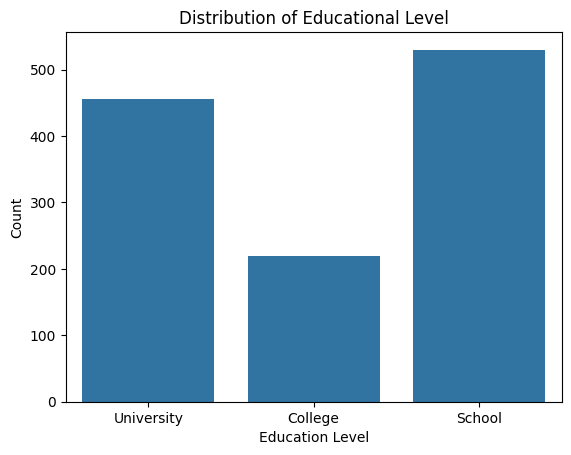

In [21]:
##Bar-plot for  Education Level attribute
sns.countplot(x='Education Level', data=df)
plt.title("Distribution of Educational Level")
plt.ylabel("Count")
plt.show()

Distribution of Educational Level: Bar Chart
This bar chart shows that school students form the largest group (about %44), followed by university students (about 39%).. college students are the smallest group compared to the others (about 17%).


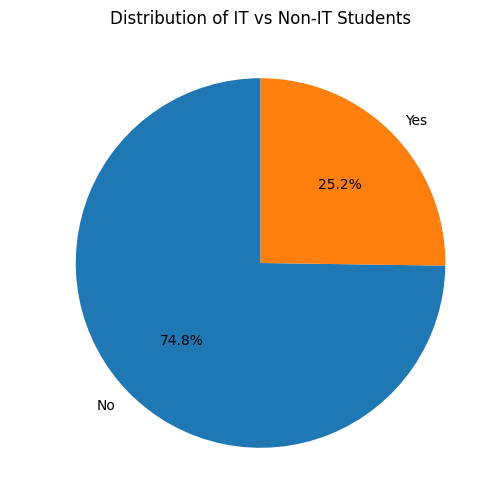

In [22]:
# Count values for IT Student
counts = df["IT Student"].value_counts()

# Pie chart
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of IT vs Non-IT Students")
plt.ylabel(' ')
plt.show()

Distribution of IT vs Non-IT Students: Pie Chart
This pie chart shows that about 75% of the students are non-IT, while only around 25% are IT students. Which means IT students are much fewer in this dataset.



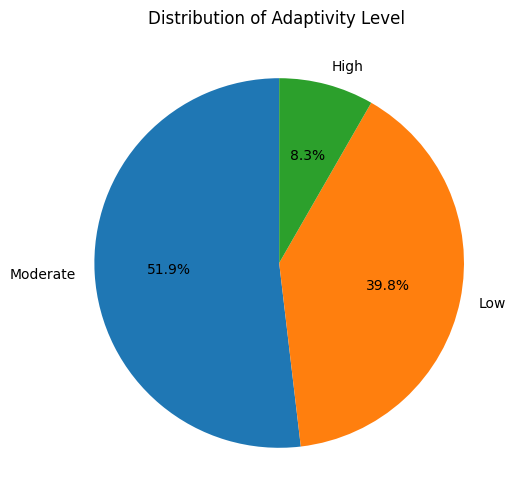

In [23]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

Distribution of Adaptivity Level: Pie Chart
This pie chart shows that the majority of students have a moderate adaptability level (about 52%).. a smaller group is at low level (about 40%), and very few students are at high adaptability (about 8%).



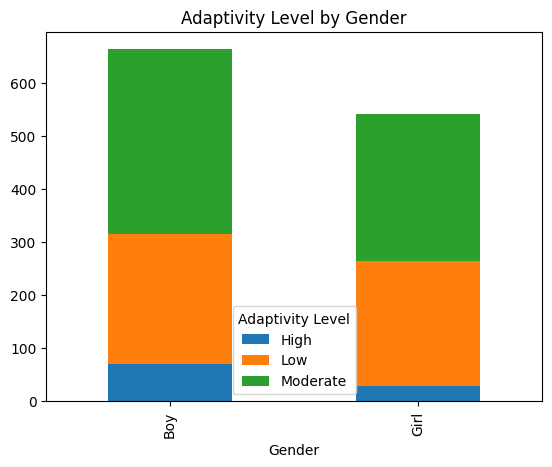

In [24]:
#Stacked bar chart
pd.crosstab(df["Gender"], df["Adaptivity Level"]).plot(kind="bar", stacked=True)
plt.title("Adaptivity Level by Gender")
plt.show()

Adaptivity Level by Gender: Stacked Bar Chart
This stacked bar chart shows that both boys and girls are mostly moderate in adaptability.. boys have slightly higher numbers in all three levels compared to girls (boys: 55% moderate, 37% low, 8% high vs girls: 50% moderate, 42% low, 8% high).



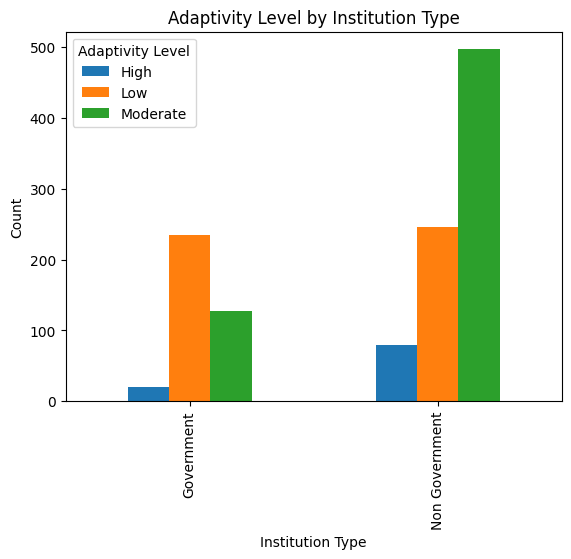

In [25]:
#Grouped bar chart
pd.crosstab(df["Institution Type"], df["Adaptivity Level"]).plot(kind="bar")
plt.title("Adaptivity Level by Institution Type")
plt.ylabel("Count")
plt.show()

Adaptivity Level by Institution Type: Grouped Bar Chart
This grouped bar chart shows that non-government students are the largest group (about 68%), and most of them are at moderate adaptability (around 50%).. government students are fewer overall (about 32%), with many at low adaptability (around 45%).


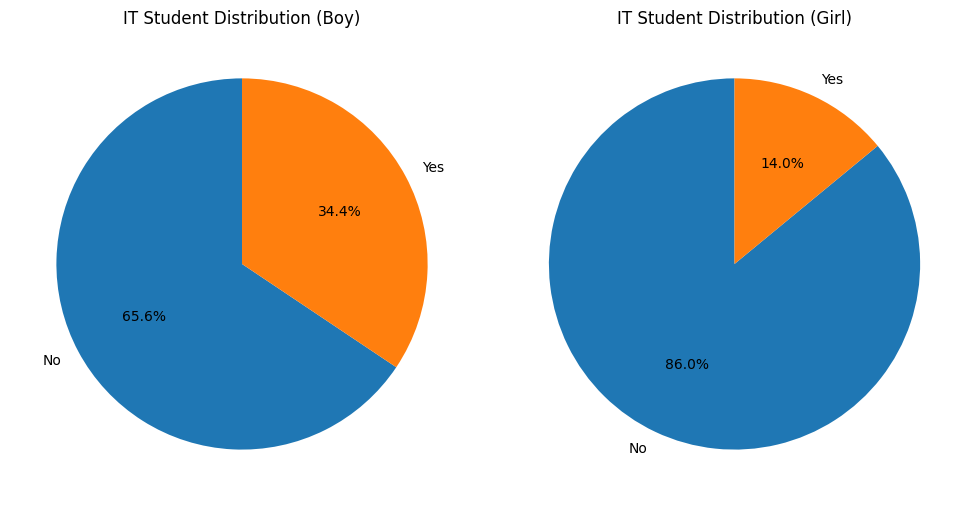

In [26]:
import matplotlib.pyplot as plt

# Unique values of Gender
genders = df["Gender"].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(10,5))

for i, gender in enumerate(genders):
    counts = df[df["Gender"] == gender]["IT Student"].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"IT Student Distribution ({gender})")

plt.tight_layout()
plt.show()


IT Student Distribution (Boy vs Girl): Pie Charts
These pie charts show that boys have a larger share of IT students, about one-third of them are in IT (34%).. only a small portion of girls are IT (14%), while most are non-IT (86%).


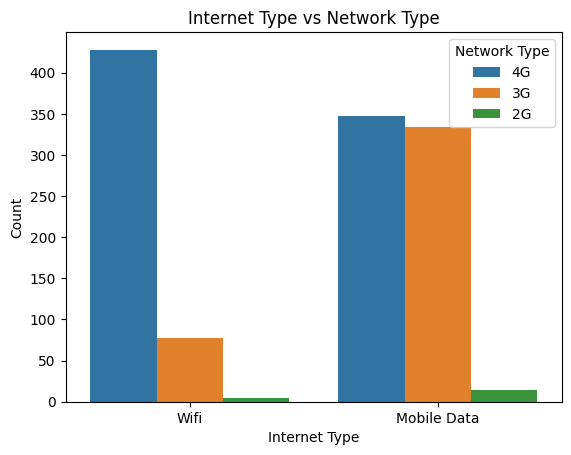

In [27]:
sns.countplot(x="Internet Type", hue="Network Type", data=df)
plt.title("Internet Type vs Network Type")
plt.ylabel("Count")
plt.show()

Internet Type vs Network Type: Bar Chart
This bar chart shows that Wi-Fi users mostly connect through 4G networks (around 70%), while fewer use 3G (about 25%).. for mobile data users, 3G (about 48%) and 4G (about 47%) are almost equally used, while 2G is very rare (about 5%).



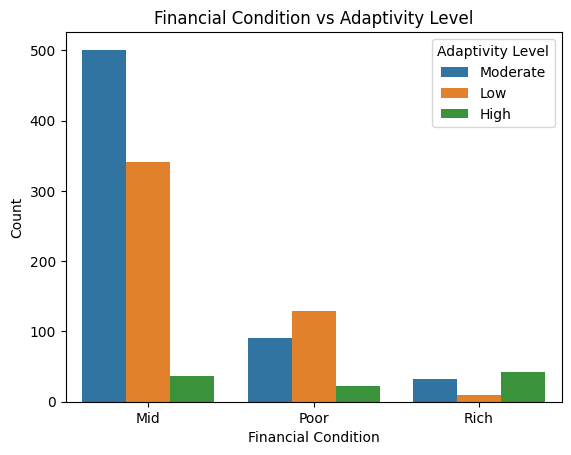

In [28]:
sns.countplot(x="Financial Condition", hue="Adaptivity Level", data=df)
plt.title("Financial Condition vs Adaptivity Level")
plt.ylabel("Count")
plt.show()


Financial Condition vs Adaptivity Level: Bar Chart
This bar chart shows that most students from middle financial condition are at moderate adaptability (about 55%).. students from poor condition are more likely to have low adaptability (about 60%), while rich students are very few overall (less than 5%).


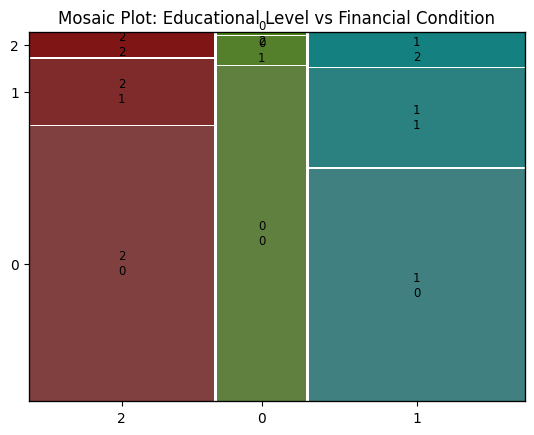

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Make sure column names match your dataset exactly
mosaic(df, ['Education Level', 'Financial Condition'])
plt.title("Mosaic Plot: Educational Level vs Financial Condition")
plt.show()

Graph mosaic description: this graph shows us a visual comparison between students' financial condition against there education level, we noticed that in each education level category, students mostly come from a middle-class family regarding their financial condition.

Because the data is mostly categorical (not numeric), we can’t apply the five-number summary [which shows the minimum, Q1, median, Q3, and maximum] the way we do with numeric columns.

In [33]:
# Data Preprocessing
import pandas as pd

URL = "https://raw.githubusercontent.com/RandDahmash/Mining-project/main/Dataset/Raw_dataset.csv"

df = pd.read_csv(URL)
print(df.head())


# Step 1: Checking missing values
print("Checking for missing values in each column")
print(df.isnull().sum())

# Explanation:
 # If all values are 0, it means there are no missing values in the dataset.

# Step 2: Encoding categorical variables
# Many of our attributes are categorical like (Gender, Education Level).

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

print("All categorical attributes have been encoded into numeric form.")

# Saving the cleaned and encoded dataset
df.to_csv("Preprocessed_dataset.csv", index=False)

print("Preprocessed_dataset.csv is saved")

  Gender     Age Education Level Institution Type IT Student Location  \
0    Boy   21-25      University   Non Government         No      Yes   
1   Girl   21-25      University   Non Government         No      Yes   
2   Girl   16-20         College       Government         No      Yes   
3   Girl  15-Nov          School   Non Government         No      Yes   
4   Girl   16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G          6-Mar   
1          High                 Mid   Mobile Data           4G          3-Jan   
2           Low                 Mid          Wifi           4G          3-Jan   
3           Low                 Mid   Mobile Data           4G          3-Jan   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate 

In [34]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.449793,2.247303,1.196680,0.682988,0.252282,0.775934,0.833195,0.341909,0.423237,1.627386,1.047303,0.174274,0.890456,1.435685
std,0.497679,1.242353,0.722437,0.465506,0.434503,0.417139,0.372956,0.605302,0.494277,0.515295,0.548559,0.379502,0.384003,0.642013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


After the preprocessing steps and encoding all categorical data into numeric form, we became able to compute and display the five-number summary (Minimum, Q1, Median, Q3, Maximum) for the numerical attributes.